In [1]:
!git clone https://github.com/cchen744/uhi-extreme-heat-response.git

Cloning into 'uhi-extreme-heat-response'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 5.20 KiB | 1.30 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [6]:
!mv /content/drive/MyDrive/Colab_Notebooks/01_data_exploration.ipynb /content/uhi-extreme-heat-response/notebooks

mv: cannot stat '/content/drive/MyDrive/Colab_Notebooks/01_data_exploration.ipynb': No such file or directory


In [ ]:
# download dependency
!pip -q install earthengine-api geemap geopandas shapely pyproj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pandas as pd
import os, ee, geemap

In [ ]:
ee.Authenticate()
ee.Initialize(project='extremeweatheruhi')

You have already mounted Google Drive. Now, replace `'path/to/your/shapefile.shp'` with the actual path to your shapefile in Google Drive. For example, if your file is in 'My Drive/gis_data/my_shapefile.shp', the path would be '/content/drive/My Drive/gis_data/my_shapefile.shp'.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Extracting data

### 1.1 City Boundaries from US Census

In [ ]:
# Make sure to import geopandas at the beginning of your notebook (it's already done in cell FITvIT54Pwzv)

# Replace with the actual path to your shapefile in Google Drive
shapefile_path = '/content/drive/MyDrive/GeoAI/UrbanHeatIsland/data/tl_2025_us_uac20.shp'

# Set GDAL environment variable to restore missing .shx file
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

try:
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile loaded successfully:")
    display(gdf.head())
    print("CRS:", gdf.crs)
    print("Bounds:", gdf.total_bounds)  # [minx, miny, maxx, maxy]
    print("Rows:", len(gdf))
    print("Columns:", list(gdf.columns)[:10])
except FileNotFoundError:
    print(f"Error: The shapefile at '{shapefile_path}' was not found. Please check the path and ensure all associated files are present.")
except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")

Shapefile loaded successfully:


,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,11139,11139,400C200US11139,"Buckeye North, AZ","Buckeye North, AZ Urban Area",67,G3500,S,7276723,0,+33.6716952,-112.6230359,"MULTIPOLYGON (((-112.61257 33.65556, -112.6129..."
1,34286,34286,400C200US34286,"Grand Lake, CO","Grand Lake, CO Urban Area",67,G3500,S,13928266,149149,+40.2335164,-105.8560831,"MULTIPOLYGON (((-105.85759 40.25798, -105.8575..."
2,72620,72620,400C200US72620,"Pueblo West, CO","Pueblo West, CO Urban Area",67,G3500,S,57144582,36776,+38.3189075,-104.7570200,"MULTIPOLYGON (((-104.71603 38.36288, -104.7160..."
3,24539,24539,400C200US24539,"Douglas, MI","Douglas, MI Urban Area",67,G3500,S,10961033,1401554,+42.6532307,-086.1968772,"MULTIPOLYGON (((-86.21843 42.61536, -86.21862 ..."
4,81472,81472,400C200US81472,"Shenandoah--Frackville, PA","Shenandoah--Frackville, PA Urban Area",67,G3500,S,7587731,168615,+40.7986696,-076.2144386,"MULTIPOLYGON (((-76.22126 40.79827, -76.22108 ..."


CRS: EPSG:4269
Bounds: [-170.78931   -14.365419  145.791574   64.928893]
Rows: 2644
Columns: ['UACE20', 'GEOID20', 'GEOIDFQ20', 'NAME20', 'NAMELSAD20', 'LSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20']


from matplotlib import pyplot as plt
_df_0['ALAND20'].plot(kind='hist', bins=20, title='ALAND20')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AWATER20'].plot(kind='hist', bins=20, title='AWATER20')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('UACE20').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('GEOID20').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('GEOIDFQ20').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('NAME20').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ALAND20', y='AWATER20', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['ALAND20'].plot(kind='line', figsize=(8, 4), title='ALAND20')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AWATER20'].plot(kind='line', figsize=(8, 4), title='AWATER20')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['GEOID20'].value_counts()
    for x_label, grp in _df_9.groupby('UACE20')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('UACE20')
_ = plt.ylabel('GEOID20')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['GEOIDFQ20'].value_counts()
    for x_label, grp in _df_10.groupby('GEOID20')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GEOID20')
_ = plt.ylabel('GEOIDFQ20')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NAME20'].value_counts()
    for x_label, grp in _df_11.groupby('GEOIDFQ20')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GEOIDFQ20')
_ = plt.ylabel('NAME20')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NAMELSAD20'].value_counts()
    for x_label, grp in _df_12.groupby('NAME20')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NAME20')
_ = plt.ylabel('NAMELSAD20')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['UACE20'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='ALAND20', y='UACE20', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['GEOID20'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='ALAND20', y='GEOID20', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['GEOIDFQ20'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='ALAND20', y='GEOIDFQ20', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['NAME20'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='ALAND20', y='NAME20', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

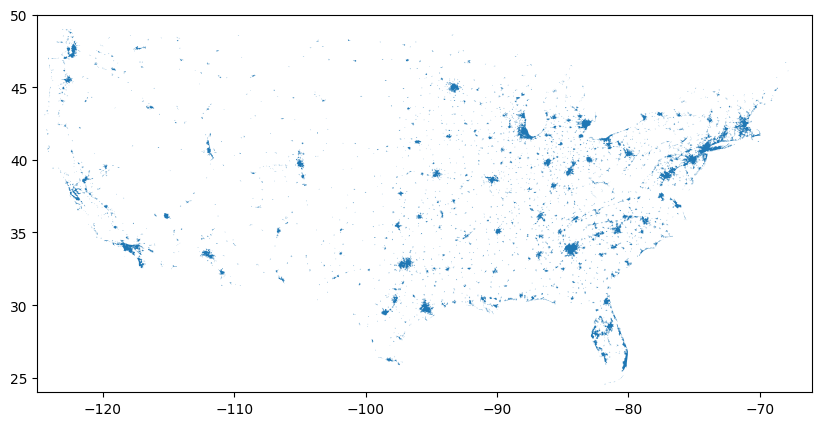

In [ ]:
ax = gdf.plot(figsize=(10, 6), linewidth=0.1)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
plt.show()

### 1.2 Temperature data from PRISM

Get PRISM data from google earth engine.
- daily tmean from 2005 - 2025

In [ ]:
# load PRISM daily
prism = ee.ImageCollection("OREGONSTATE/PRISM/ANd")
## select only tmean
prism_tmean = prism.select("tmean")
## check bands
print(ee.Image(prism_tmean.first()).bandNames().getInfo())
## filter
prism_year = prism_tmean.filterDate('2005-01-01', '2026-01-01')
## check count
print("Count:", prism_year.size().getInfo())
## check first/last date
first_date = ee.Image(prism_year.sort("system:time_start").first()).date().format("YYYY-MM-dd").getInfo()
last_date  = ee.Image(prism_year.sort("system:time_start", False).first()).date().format("YYYY-MM-dd").getInfo()
print("First:", first_date, "Last:", last_date)

# A quick sanity check of temperature scale
roi = ee.Geometry.Point([-87.41, 41]).buffer(2000)
## pick one day, for example the first day, 2005-01-01
img0 = ee.Image(prism_year.first()).clip(roi)
## reduceRegion mean
stats = img0.reduceRegion(
    reducer=ee.Reducer.median(),
    geometry=roi,
    scale=4000,
    maxPixels=1e13
).getInfo()
print(stats)

['tmean']
Count: 7670
First: 2005-01-01 Last: 2025-12-31
{'tmean': 5.839000225067139}


Now transform PRISM image into features in table

In [ ]:
# define a function that transforms daily temperature data into date+tmean feature
def daily_to_feature(img, roi, tag):
  '''
  Convert a daily temperature image to a feature with date and tmean properties.
  '''
  # 1) compute statistic over roi
  stat = img.reduceRegion(
      reducer=ee.Reducer.median(),
      geometry=roi,
      scale=4000,
      maxPixels=1e13
  )
  # 2) get date string
  date_str = img.date().format("YYYY-MM-dd")
  # 3) extract value (server-side)
  value = stat.get("tmean")
  # 4) build feature with only the fields you want (avoid keeping raw 'tmean')
  new_key = f"tmean_{tag}"  # build key client-side for stability
  feat = ee.Feature(None, {}) \
      .set("date", date_str) \
      .set(new_key, value)

  # Optional: ensure only two columns exist
  feat = feat.select(["date", new_key])

  return feat

# ---- Apply to the collection (map requires a ONE-ARG function: f(img)) ----
roi_placeholder = roi          # keep your current roi for now
tag_placeholder = "urban"      # reserve for future nonurban
fc = ee.FeatureCollection(
    prism_year.map(lambda img: daily_to_feature(img, roi_placeholder, tag_placeholder))
)
print(fc.size().getInfo())
# Check the first line of feature collection
print(fc.first().propertyNames().getInfo())
print(fc.first().getInfo()["properties"])

7670
['system:index', 'date', 'tmean_urban']
{'date': '2005-01-01', 'tmean_urban': 5.839000225067139}


In [ ]:
# Table 1: daily temperature of urban area
fc_urban = ee.FeatureCollection(
    prism_year.map(lambda img: daily_to_feature(img, roi_placeholder, 'urban'))
)
# Table 2: daily temperature of non_urban area
fc_nonurban = ee.FeatureCollection(
    prism_year.map(lambda img: daily_to_feature(img, roi_placeholder, 'nonurban'))
)
print(fc_nonurban.first().propertyNames().getInfo())
# Join two tables
condition = ee.Filter.equals(
    leftField="date",
    rightField="date"
)

joined_pairs = ee.Join.inner().apply(fc_urban, fc_nonurban, condition)

# Merge primary + secondary properties into one Feature
def merge_pair(f):
  f = ee.Feature(f)
  left = ee.Feature(f.get("primary"))
  right = ee.Feature(f.get("secondary"))

  # combine dictionaries of properties
  # left.toDictionary(), right.toDictionary(), dict1.combine(dict2, overwrite=True)
  merged_props = left.toDictionary().combine(right.toDictionary(), True)

  return ee.Feature(None, merged_props)

fc_joined = ee.FeatureCollection(joined_pairs.map(merge_pair))

print(fc_joined.first().propertyNames().getInfo())
print(fc_joined.size().getInfo())

['system:index', 'date', 'tmean_nonurban']
['system:index', 'date', 'tmean_nonurban', 'tmean_urban']
7670
